### Import packages

In [56]:
import pandas as pd; import os; from analysis_helpers import *; import warnings
from analysis_helpers import *
warnings.filterwarnings('ignore')
import seaborn as sb
import numpy as np
from scipy.interpolate import pchip
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import numpy as np
import scipy as sp
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema
import pingouin

### Load data

In [57]:
b     = pd.read_csv('behavioral.csv') 
d_nov = pd.read_csv('d_nov_pres.csv')

### Add last-cued category to memory trials

In [58]:
# for idx,x in b[(b['Trial']==9)&(b['Trial Type']=='Presentation')].iterrows():
#     b.loc[(b['UniqueID']==x['UniqueID']) &
#          (b['Run']==x['Run'])
#          &(b['Trial Type']=='Memory'),'Cued Category'] = x['Cued Category']

In [59]:
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Cued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Cued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Face' ) & (b['Category']=='Place'), 'Attention Level'] = 'Novel_Uncued_Cat'
# b.loc[(b['Attention Level']=='Novel') & (b['Cued Category']=='Place') & (b['Category']=='Face' ), 'Attention Level'] = 'Novel_Uncued_Cat'  

### Separate behavioral and variable

In [60]:
bvar = b[(b['UniqueID']>=30)] 
bsus = b[(b['UniqueID']<=29)] 

### All images, Variable --> significant effect of Category, Attention Level, and interaction

In [61]:
# Variable Attention

# groupby subject, attention level, category
bot = bvar.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# repeated measures anova --> familiarity_rating ~ category * attention_level
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                  data=bot)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,3.457534,1,22,3.457534,10.892946,3.258622e-03,3.258622e-03,0.331164,1.000000
1,Attention Level,13.437214,5,110,2.687443,27.729559,4.463426e-18,8.250565e-09,0.557607,0.418133
2,Category * Attention Level,1.500378,5,110,0.300076,8.182699,1.344844e-06,6.410325e-05,0.271106,0.644188


### Follow up t-test (scene / face)

In [62]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot).head(n=1)

,Contrast,Category,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Category,-,Face,Place,True,True,-3.279143,22.0,two-sided,0.003427,12.177,-0.649105


### Novel images, Variable --> Trending towards sig diff between categories (not attention level)

In [63]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Category,Face,Place,True,True,-1.239876,22.0,two-sided,0.228084,0.431,-0.222927


### All images, Sustained --> significant effect of Category, Attention Level, and interaction

In [64]:
# # Sustained Attention

# # groupby subject, attention level, category
# bot = bsus.groupby(['UniqueID','Attention Level','Category'],as_index=False).mean()

# # repeated measures anova --> familiarity_rating ~ category * attention_level
# pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
#                   data=bot)

In [65]:
# ts = pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID',data=bot)
# ts[ts['p-unc']<.05]

### Novel images, Sustained --> Significant diff for attention level, and interaction, but not category alone

In [66]:
pingouin.rm_anova(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Category,0.194688,1,22,0.194688,1.832825,0.189540,0.189540,0.076903,1.0
1,Attention Level,0.007341,1,22,0.007341,0.369653,0.549419,0.549419,0.016525,1.0
2,Category * Attention Level,0.003901,1,22,0.003901,0.240182,0.628927,0.628927,0.010799,1.0


In [67]:
pingouin.pairwise_ttests(dv='Familiarity Rating', within=['Category','Attention Level'], subject='UniqueID', 
                         data=bot[(bot['Attention Level'].isin(['Novel_Cued_Cat','Novel_Uncued_Cat']))])


,Contrast,Category,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,Category,-,Face,Place,True,True,-1.239876,22.000000,two-sided,0.228084,0.431,-0.222927
1,Attention Level,-,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.776296,22.000000,two-sided,0.445841,0.287,-0.064994
2,Category * Attention Level,Face,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.133293,42.873231,two-sided,0.894585,0.297,-0.038964
3,Category * Attention Level,Place,Novel_Cued_Cat,Novel_Uncued_Cat,True,True,-0.218306,42.996049,two-sided,0.828223,0.301,-0.063908


<hr>

# Behavioral recap

In both experiments, category, attention level, and interaction all influence familiarity.

#### Within novel images:

<b>variable:</b> only category has an influence.

<b>sustained:</b> only attention level and interaction have an influence?

<hr>

# Pupil data

In [68]:
d_nov['Experiment'] = np.nan
d_nov.loc[d_nov['UniqueID']<=29, 'Experiment'] = 'Sustained'
d_nov.loc[d_nov['UniqueID']>=30, 'Experiment'] = 'Variable'

### Data processing function

Link image info from presentation and memory trials

In [69]:
def run_p_level(df):
    '''
    input: df containing pres and mem from single run
    output: df of mem images w/ corresponding pres run and pres trial info
    '''

    df['p_run'] = np.nan; df['p_trial'] = np.nan
    
    # loop over the memory trials in this run
    for index,row in df[df['Trial Type']=='Memory'].iterrows():

        # obtain the image presented in the memory run
        mem_image = row['Memory Image']

        # look in the columns for previously presented composites
        for composite in ['Cued Composite', 'Uncued Composite']:

            # if one of the previously seen composites contains the memory image file name (minus the last 4 chars: '.jpg')
            if df[df[composite].str.contains(mem_image[:-4], na=False)].shape[0]!=0:
                
                # pull run info 
                df['p_run'][index]  = df[df[composite].str.contains(mem_image[:-4], na=False)]['Run'].item()
                
                # pull trial info
                df['p_trial'][index] = df[df[composite].str.contains(mem_image[:-4], na=False)]['Trial'].item()
                   
    return(df)

In [70]:
big_list = []

# for each participant (behavioral)
for s in b['UniqueID'].unique():
    
    # make df where their mem trials indexed by pres trials...
    big_list.append(run_p_level(b[b['UniqueID']==s]))
    
labeled = pd.concat(big_list)

In [71]:
# labeled[~labeled['p_run'].isna()]['p_run'].unique()

In [72]:
# labeled[(~labeled['p_run'].isna())&(~labeled['Familiarity Rating'].isna())][['p_run','p_trial','UniqueID','Attention Level']]

In [73]:
d_nov['Familiarity Rating'],d_nov['Attention Level'] = np.nan, np.nan

# for each mem row of prev seen that got a rating...
for index,row in labeled[(labeled['Familiarity Rating'].isin([1,2,3,4]))&(labeled['p_run'].isin([0,1,2,3,4,5,6,7]))].iterrows():

    p_run   = row['p_run']
    p_trial = row['p_trial']
    
    d_nov.loc[(d_nov['Run']==p_run)&(d_nov['Trial']==p_trial),'Familiarity Rating'] = row['Familiarity Rating']
    d_nov.loc[(d_nov['Run']==p_run)&(d_nov['Trial']==p_trial),'Attention Level']    = row['Attention Level']


In [74]:
d_nov['Familiarity Rating'],d_nov['Attention Level'] = np.nan, np.nan

# for each mem row of prev seen that got a rating...
for index,row in labeled[(~labeled['p_run'].isna())&(~labeled['Familiarity Rating'].isna())&(labeled['Trial Type']=='Memory')].iterrows():

    p_run   = row['p_run']
    p_trial = row['p_trial']
    run     = row['Run']
    trial   = row['Trial']
    
    d_nov.loc[(d_nov['Run']==run)&(d_nov['Trial']==trial),'Familiarity Rating'] = row['Familiarity Rating']
    d_nov.loc[(d_nov['Run']==run)&(d_nov['Trial']==trial),'Attention Level']    = row['Attention Level']

# Mean Plots

No handles with labels found to put in legend.


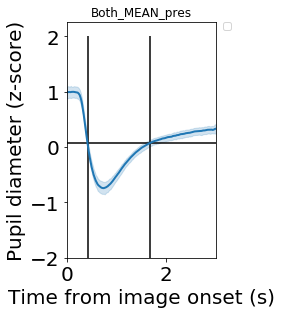

In [75]:
# group data by experiment, participant, timepoint
attn_group = d_nov[d_nov['Attention Level'].isin(['Full','Category',
                                                  'Side','None'])].groupby(['Experiment',
                                                                            'UniqueID','Time'], as_index=False).mean()
missing_subs = []

# mean prev seen figure
plt.figure(figsize=(3, 4));
sb.lineplot(x='Time', y='Interp', data=attn_group, linewidth = 2, palette="RdBu")
plt.savefig('Average_Pres_All.pdf')

# sub_mean has average pupil response at each timepoint across all participants
sub_mean = attn_group.groupby(['Time'],as_index=False).mean()

# pup_mean is the average pupil dilation value across all timepoints 
pup_mean = sub_mean['Interp'].mean()

# label each time in the mean timecourse as above or below pup_mean
sub_mean['mean_divide'] = np.nan
sub_mean.loc[sub_mean['Interp']<pup_mean,  'mean_divide'] = 0
sub_mean.loc[sub_mean['Interp']>pup_mean,  'mean_divide'] = 2
sub_mean.loc[sub_mean['Interp']==pup_mean, 'mean_divide'] = 1
mean_div_list = list(sub_mean['mean_divide'])

# for each labeled timepoint
for idx,x in enumerate(mean_div_list):
    
    # if that point's label does not match its neighbors' labels
    if x != mean_div_list[idx-1] and x!= mean_div_list[idx+1]:
        
        # switch it to match its neighbors
        if mean_div_list[idx-1] == mean_div_list[idx+1]:
            mean_div_list[idx] = mean_div_list[idx+1]
            print('fixed one at index:'+str(idx))
        else:
            print("issue!")
            
# add corrected labels to sub_mean df
sub_mean['mean_divide'] = mean_div_list

# MAKE BINS
# start first bin with timepoint 0
bins=[0]

# for each labeled timepoint
for idx,row in sub_mean.iterrows():
    if idx != 0:
        
        # save the timepoints where each block of labels changes
        if row['mean_divide']!=sub_mean['mean_divide'][idx-1]:
            plt.vlines(row['Time'], -2, 2)
            bins.append(sub_mean['Time'][idx-1])
            bins.append(row['Time'])
            
# end last bin with last timepoint
bins.append(3)

# make df of time bin boundaries and save to csv
key_name = 'Both'; filename = 'Both_PrevSeen_Bins.csv'
bin_df = pd.DataFrame({key_name:bins})
bin_df.to_csv(filename)

# plot pup_mean as horizontal line
plt.hlines(pup_mean, 0, 3)
plt.tight_layout()

# make plot
plt.xlim((0 , 3)); plt.ylim((-2, 2.25)); plt.tick_params(labelsize=20)
plt.xlabel("Time from image onset (s)", size = 20); plt.ylabel("Pupil diameter (z-score)", size = 20)
plt.title('Both_'+'MEAN'+'_'+'pres')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig_name = 'NEW_'+'ALL'+'_'+'MEAN'+'_'+'PREV_SEEN_PRES_CHUNK'+'.pdf'

plt.savefig(fig_name)
plt.show()

# Mean Plots with Chunking

In [76]:
binnies

[0.0,
 0.4228187919463087,
 0.44295302013422816,
 1.751677852348993,
 1.7718120805369126,
 3.0]

In [77]:
d_nov['Familiarity'] = np.nan
d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

# for each experiment
# for e in ['Sustained','Variable']:
    
binnies =  pd.read_csv('Both_PrevSeen_Bins.csv')
binnies = list(binnies['Both'])

# for each attention level
for c in attn_group['Attention Level'].unique():

    # for each chunk
    chunk_1 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[0])&(attn_group['Time']<=binnies[1])]
    chunk_2 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[2])&(attn_group['Time']<=binnies[3])]
    chunk_3 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[4])&(attn_group['Time']<=binnies[5])]


In [78]:
# import scipy

# chunk_1 = chunk_1.groupby(['UniqueID','Familiarity'], as_index=False).mean()
# scipy.stats.ttest_ind(chunk_1[chunk_1['Familiarity']=='Familiar']['Interp'],chunk_1[chunk_1['Familiarity']=='Unfamiliar']['Interp'])

# Add labels combining ratings 1-2 and 3-4

In [79]:
d_nov['Familiarity'] = np.nan
d_nov.loc[(d_nov['Familiarity Rating']==1) | (d_nov['Familiarity Rating']==2), 'Familiarity'] = 'Unfamiliar'
d_nov.loc[(d_nov['Familiarity Rating']==3) | (d_nov['Familiarity Rating']==4), 'Familiarity'] = 'Familiar'
attn_group = d_nov.groupby(['Experiment','UniqueID','Familiarity','Time','Attention Level'], as_index=False).mean()

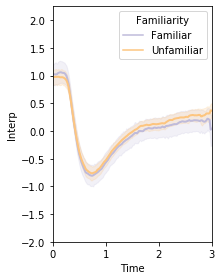

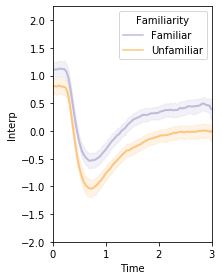

Full chunk Ttest_indResult(statistic=3.413204133888975, pvalue=0.0009562678456399819): 
Ttest_indResult(statistic=3.413204133888975, pvalue=0.0009562678456399819)

Full chunk Ttest_indResult(statistic=5.756021156520288, pvalue=1.1239408314301612e-07): 
Ttest_indResult(statistic=5.756021156520288, pvalue=1.1239408314301612e-07)

Full chunk Ttest_indResult(statistic=5.468606900639324, pvalue=3.871855591041551e-07): 
Ttest_indResult(statistic=5.468606900639324, pvalue=3.871855591041551e-07)



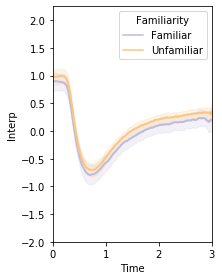

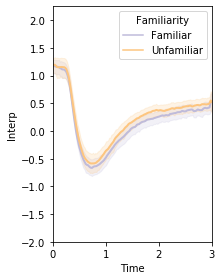

In [80]:
binnies =  pd.read_csv('Both_PrevSeen_Bins.csv')
binnies = list(binnies['Both'])

# for each attention level
for c in attn_group['Attention Level'].unique():

        # for each chunk
        chunk_1 = attn_group[(attn_group['Attention Level']==c)&(attn_group['Time']>=binnies[0])&
                             (attn_group['Time']<=binnies[1])]
        chunk_1 = chunk_1.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        one = scipy.stats.ttest_ind(chunk_1[chunk_1['Familiarity']=='Familiar']['Interp'],
                                    chunk_1[chunk_1['Familiarity']=='Unfamiliar']['Interp'])

        chunk_2 = attn_group[(attn_group['Attention Level']==c)&
                             (attn_group['Time']>=binnies[2])&(attn_group['Time']<=binnies[3])]
        chunk_2 = chunk_2.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        two = scipy.stats.ttest_ind(chunk_2[chunk_2['Familiarity']=='Familiar']['Interp'],
                                    chunk_2[chunk_2['Familiarity']=='Unfamiliar']['Interp'])

        chunk_3 = attn_group[(attn_group['Attention Level']==c)
                             &(attn_group['Time']>=binnies[4])&(attn_group['Time']<=binnies[5])]
        chunk_3 = chunk_3.groupby(['UniqueID','Familiarity'], as_index=False).mean()
        three = scipy.stats.ttest_ind(chunk_3[chunk_3['Familiarity']=='Familiar']['Interp'],
                                      chunk_3[chunk_3['Familiarity']=='Unfamiliar']['Interp'])

        
        
        plt.figure(figsize=(3.25, 4)); #print(e);print(c);

        # palette = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

        sb.lineplot(x='Time', y='Interp', hue='Familiarity', 
                    data=attn_group[attn_group['Attention Level']==c], 
                    linewidth = 2, palette='PuOr_r')

        plt.ylim(-2, 2.25); plt.xlim(0,3); plt.tight_layout()

        plt.savefig('all_'+c+'_presentation.pdf')
        plt.show()
        
        # pairwise t-tests
        # print result
        for n in [one, two, three]:
            if n.pvalue<=.06:
                print(c+' chunk ' + str(n)+': '); print(n); print()
